In [7]:
from Quaternion_Polarization_module import *

#### 1. _State_ Class

You can initialize a polarization state using the class
 
 __"_State(alpha = 0, chi = 0)_"__, 
 
 where you need to specify the orientation angle "_alpha_"($\alpha$) and the ellipticity angle "_chi_"($\chi$) of the polarization ellipse related with the state of polarization you want to describe. THE ANGLES MUST BE GIVEN IN **DEGREES**

<center><img src="polarization_ellipse.png" alt="Graphic of the Polarization ellipse and its respective main angles; the orientation angle 'alpha' and the ellipticity angle 'chi' " style="height: 300px; width:300px;"/></center>

In [4]:
#Create an Right Circular State of Polarization
RC = State(0, 45)
#Create an Left Circular State of Polarization
LC = State(0, -45)
#Create a Vertical Linear State of polarization
vertical = State(90,0)
#Create a Horizontal Linear State of polarization (by default)
horizontal = State()

# TODO: Displaying the State will retrieve its representation in the quaternion formalism
print(RC, LC, vertical, horizontal)

quaternion(1, 6.12323399573677e-17, 0, 1) quaternion(1, 6.12323399573677e-17, 0, -1) quaternion(1, -1, 1.22464679914735e-16, 0) quaternion(1, 1, 0, 0)


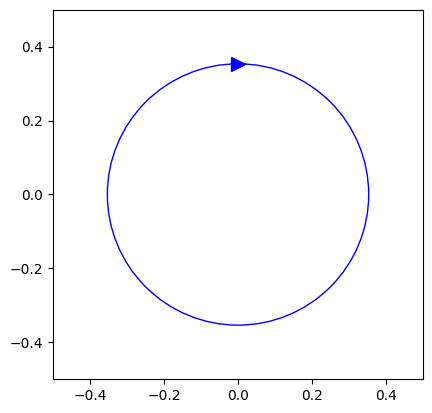

In [5]:
#You can graphic the ellipse of polarization associated with each State
RC.ellipse()

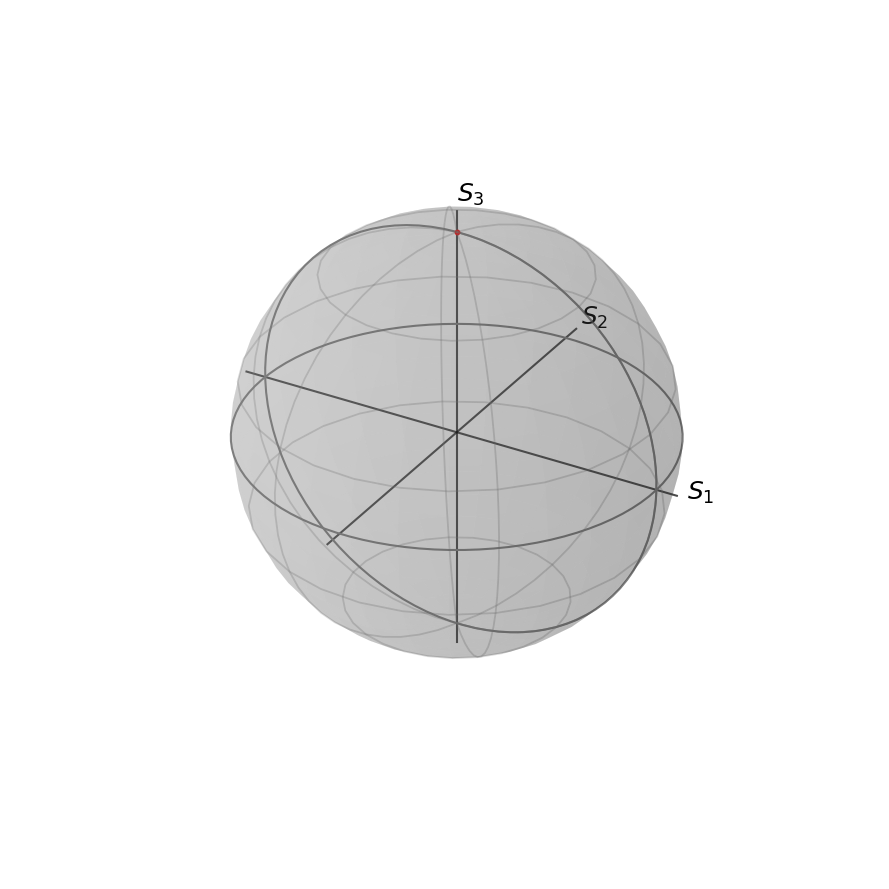

In [8]:
#and you can graphic the polarization state representation on the Poincaré Sphere
RC.Poincare_sphere()

#### 2. Waveplate Class and its Subclasses

You can initialize a Waveplate using the class

__"_Waveplate(phase_shift = 0, axis_angle = 0, eigenstate = (0,0))_"__,

where you need to specify the angle "*phase_shift* $ = \frac{2\pi}{\lambda}\Delta n l$" which is a property of the waveplate given by its birrefringence. The angle "*axis_angle*" is the orientation of the waveplate's eigenmodes withrespect the horizontal axis in the laboratory frame reference. Finally, the eigenstate is a tuple/list *"(alpha, chi)"*$(\alpha, \chi)$ that defines the waveplate's eigenstates, i.e. the polarization states that remain invariant under transformations due to the waveplate operator; you only need to specify a single state determined by the angles *(alpha, chi)*$(\alpha, \chi)$ since the waveplate only have two eigenstates and they are always orthogonal. THE ANGLES MUST BE GIVEN IN **DEGREES**

In [14]:
 #Create an arbitraty waveplate
arbitrary_wp = Waveplate(45, 0, (30,20))
 # When displaying the Waveplate object it retrieves its operator in the quaternion representation
arbitrary_wp

quaternion(0.923879532511287, 0.146576258418487, 0.253877526764165, 0.245984168756596)

##### 2.1 Half-waveplates and Quater-waveplates

There are two spetial kinds of waveplates, the Half-waveplates(Hwp) and the Quater-waveplate(Qwp):

a. The Hwp is a waveplate whose *__phase_shift__* is always $180°$ since introduces a retardance of half of a wavelenght on an electromagnetic wave. 

b. The Qwp is a waveplate whose *__phase_shift__* is always $90°$ since introduces a retardance of 1/4 of a wavelenght on an electromagnetic wave.

You can use the subclasses
 
 *__Hwp( axis_angle = 0, eigenstate =(0,0) )__* and *__Qwp( axis_angle = 0, eigenstate =(0,0) )__*,

to initialize a Hwp and a Qwp respectivelly.

In [16]:
# create a Hwp and a Qwp with the default args, i.e. a Hwp and a Qwp 
# with linear eigenstates and its eigenmodes aligned with the lab frame reference.
my_Hwp = Hwp()
my_Qwp = Qwp()
print(my_Hwp, my_Qwp)

quaternion(6.12323399573677e-17, 1, 0, 0) quaternion(0.707106781186548, 0.707106781186548, 0, 0)


##### 2.2 Composite Waveplate

A system consisting of the composition of multiple waveplates is called a Composite Waveplate(CW). The operator of a CW system is equivalent to the operator of another waveplate with a given phase-shift and eigenstates. To initialize a CW system we use the class 

*__Composite_waveplate( waveplates )__*

where the only argument __waveplates__ must be an ordered iterable (list, array or tuple) that contains waveplate objects


In [19]:
#Creating an ordered iterable containing waveplate objects:
waveplates = [Waveplate(phase, angle) for phase, angle in zip((90,90,180),(0,30,60))] 
#Now we create a CW object with the waveplates
cw = Composite_waveplate(waveplates)
#When displaying the CW object it retrieves its operator in the quaternion representation as the equivalent waveplate
print(cw)

quaternion(-0.683012701892219, -0.183012701892219, 0.183012701892219, 0.683012701892219)


Now, you can obtain the characterization of you CW object. That is, the angles associated with the equivalent waveplate; 

**General Caracterization**: The equivalent phase_shift, and the angles (alpha, chi) of the equivalent eigenstate.

insertar imagen

**Jones Theorem Caracterization**: A CW is also equivalent to a composition of a waveplate with linear eigenstates and a waveplate with circular eigenstates; then you obtain the angle _phi_($\varphi$) of the circular waveplate *phase_shift*, the angle _delta_($\delta$) of the linear waveplate *phase_shift* and the orientation angle _alpha_($\alpha$) related with the linear waveplate's eigenstate.

insertar imagen

In [20]:
# To obtain the caracterization you use the 'caracterization' method from the Composite_waveplate class
waveplates = [Waveplate(phase, angle) for phase, angle in zip((90,90,180),(0,30,60))] 
cw = Composite_waveplate(waveplates)
cw.caracterization()

{'Jones_Theorem': {'phi': 270.0,
  'alpha_p': 135.0,
  'delta': 29.999999999999996},
 'General_caracterization': {'gamma': 266.1590342837419,
  'alpha': 67.49999999999999,
  'chi': 34.623214508157595}}

#### 3. Operadores y Estados (Transformaciones)

In [11]:
# You can perform the transformation of a State object with a Waveplate object or a list/tuple of Waveplate objects
# using the State class method called "operate"

horizontal = State() #Horizontal state
list_of_wp = [Qwp(angle) for angle in (20,30,45)] #a list of waveplates objects
#This calculates the transformation of the state through different operators 
print(f'The transformed states through each wp is:\n {horizontal.operate(list_of_wp)}') 

#Another example: Calculating the transformation of a state due to a CW composed of the previous list of wp
cw = Composite_waveplate(list_of_wp)
#This calculates the transformation of the state through a CW
print(horizontal.operate(cw))


The transformed states through each wp is:
 [quaternion(1, 0.883022221559489, 0.32139380484327, -0.342020143325669), quaternion(1, 0.75, 0.433012701892219, -0.5), quaternion(1, 0.5, 0.5, -0.707106781186548)]
quaternion(1, 0.579282514807136, 0.0160835431862083, 0.814968151326969)


In [13]:
# The same can be done with the Waveplate Class and their subclasses
# You can perform the transformation of an Operator object to a state or a list of states

list_of_states = [State(alpha, chi) for alpha, chi in zip((20,30,45), (0,10,20))] #a list of waveplates objects
a_wp_object = Qwp(30)
#This calculates the transformation of the state through different operators 
print(f'The transformed states through a_wp_object is:\n {a_wp_object.operate(list_of_states)}') 


The transformed states through a_wp_object is:
 [quaternion(1, 0.852868531952443, 0.492403876506104, 0.17364817766693), quaternion(1, 0.875779537252266, 0.110700707948663, 0.469846310392954), quaternion(1, 0.653100778927739, -0.365159288446675, 0.663413948168939)]
